Kaggle’dan bulunan bir veri seti üzerinde analiz ve görselleştirme çalışmaları yapılır.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('nba_playoffs.csv')
df.head()

,rank,player,position,teams,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
0,1,LeBron James,SF/PF,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",7631,266,28.7,2725,432,1749,1984,1,NaN,USA,2022
1,2,Michael Jordan,SG/SF,"Chicago Bulls (1985–1993, 1995–1998)",5987,179,33.4,2188,148,1463,1963,0,2009.0,USA,2022
2,3,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,5762,237,24.3,2356,0,1050,1947,0,1995.0,USA,2022
3,4,Kobe Bryant,SG/SF,"Los Angeles Lakers (1997–2004, 2006–2012)",5640,220,25.6,2014,292,1320,1978-2020,0,2020.0,USA,2022
4,5,Shaquille O'Neal,C,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,5250,216,24.3,2041,0,1168,1972,0,2016.0,USA,2022


In [3]:
df.tail()

,rank,player,position,teams,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
20,21,James Harden,SG,Oklahoma City Thunder (2010–2012)\nHouston Roc...,3414,149,22.9,1017,369,1011,1989,1,NaN,USA,2022
21,22,Kevin McHale,PF,Boston Celtics (1981–1993),3182,169,18.8,1204,8,766,1957,0,1999.0,USA,2022
22,23,Paul Pierce,SF/SG,"Boston Celtics (2002–2005, 2008–2013)\nBrookly...",3180,170,18.7,1022,276,860,1977,0,2021.0,USA,2022
23,24,Dennis Johnson,PG,Seattle SuperSonics (1978–1980)\nPhoenix Suns ...,3116,180,17.3,1167,26,756,1954-2007,0,2010.0,USA,2022
24,25,Julius Erving,SF,Philadelphia 76ers (1977–1987),3088,141,21.9,1187,7,707,1950,0,1993.0,USA,2022


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rank                   25 non-null     int64  
 1   player                 25 non-null     object 
 2   position               25 non-null     object 
 3   teams                  25 non-null     object 
 4   total_points           25 non-null     int64  
 5   total_games            25 non-null     int64  
 6   total_points_pre_game  25 non-null     float64
 7   field_goals            25 non-null     int64  
 8   three_points_goals     25 non-null     int64  
 9   free_shots             25 non-null     int64  
 10  born                   25 non-null     object 
 11  active_player          25 non-null     int64  
 12  hall_of_fame           18 non-null     float64
 13  country                25 non-null     object 
 14  recording_year         25 non-null     int64  
dtypes: float

In [5]:
df.columns

Index(['rank', 'player', 'position', 'teams', 'total_points', 'total_games',
       'total_points_pre_game', 'field_goals', 'three_points_goals',
       'free_shots', 'born', 'active_player', 'hall_of_fame', 'country',
       'recording_year'],
      dtype='object')

In [6]:
df.shape

(25, 15)

In [7]:
df.describe()

,rank,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,active_player,hall_of_fame,recording_year
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,18.000000,25.0
mean,13.000000,4257.280000,181.360000,23.60400,1564.680000,127.200000,1000.720000,0.160000,2001.722222,2022.0
std,7.359801,1109.503775,37.178488,4.13758,433.353466,162.214878,271.159934,0.374166,14.547308,0.0
min,1.000000,3088.000000,134.000000,17.30000,1017.000000,0.000000,647.000000,0.000000,1977.000000,2022.0
25%,7.000000,3607.000000,153.000000,20.60000,1220.000000,4.000000,766.000000,0.000000,1993.500000,2022.0
50%,13.000000,3776.000000,172.000000,23.80000,1451.000000,51.000000,951.000000,0.000000,2005.000000,2022.0
75%,19.000000,4761.000000,208.000000,25.90000,1743.000000,200.000000,1168.000000,0.000000,2010.000000,2022.0
max,25.000000,7631.000000,266.000000,33.40000,2725.000000,561.000000,1749.000000,1.000000,2021.000000,2022.0


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,25.0,13.000000,7.359801,1.0,7.0,13.0,19.0,25.0
total_points,25.0,4257.280000,1109.503775,3088.0,3607.0,3776.0,4761.0,7631.0
total_games,25.0,181.360000,37.178488,134.0,153.0,172.0,208.0,266.0
total_points_pre_game,25.0,23.604000,4.137580,17.3,20.6,23.8,25.9,33.4
field_goals,25.0,1564.680000,433.353466,1017.0,1220.0,1451.0,1743.0,2725.0
three_points_goals,25.0,127.200000,162.214878,0.0,4.0,51.0,200.0,561.0
free_shots,25.0,1000.720000,271.159934,647.0,766.0,951.0,1168.0,1749.0
active_player,25.0,0.160000,0.374166,0.0,0.0,0.0,0.0,1.0
hall_of_fame,18.0,2001.722222,14.547308,1977.0,1993.5,2005.0,2010.0,2021.0
recording_year,25.0,2022.000000,0.000000,2022.0,2022.0,2022.0,2022.0,2022.0


In [9]:
df.isnull().values.any()

True

In [10]:
df.isnull().any()

rank                     False
player                   False
position                 False
teams                    False
total_points             False
total_games              False
total_points_pre_game    False
field_goals              False
three_points_goals       False
free_shots               False
born                     False
active_player            False
hall_of_fame              True
country                  False
recording_year           False
dtype: bool

In [11]:
df.isnull().sum()

rank                     0
player                   0
position                 0
teams                    0
total_points             0
total_games              0
total_points_pre_game    0
field_goals              0
three_points_goals       0
free_shots               0
born                     0
active_player            0
hall_of_fame             7
country                  0
recording_year           0
dtype: int64

In [12]:
df.head()

,rank,player,position,teams,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
0,1,LeBron James,SF/PF,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",7631,266,28.7,2725,432,1749,1984,1,NaN,USA,2022
1,2,Michael Jordan,SG/SF,"Chicago Bulls (1985–1993, 1995–1998)",5987,179,33.4,2188,148,1463,1963,0,2009.0,USA,2022
2,3,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,5762,237,24.3,2356,0,1050,1947,0,1995.0,USA,2022
3,4,Kobe Bryant,SG/SF,"Los Angeles Lakers (1997–2004, 2006–2012)",5640,220,25.6,2014,292,1320,1978-2020,0,2020.0,USA,2022
4,5,Shaquille O'Neal,C,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,5250,216,24.3,2041,0,1168,1972,0,2016.0,USA,2022


In [13]:
df["total_points"].unique()

array([7631, 5987, 5762, 5640, 5250, 5172, 4761, 4559, 4457, 4045, 3954,
       3897, 3776, 3755, 3701, 3663, 3642, 3623, 3607, 3570, 3414, 3182,
       3180, 3116, 3088], dtype=int64)

In [14]:
df["player"].unique()

array(['LeBron James', 'Michael Jordan', 'Kareem Abdul-Jabbar',
       'Kobe Bryant', "Shaquille O'Neal", 'Tim Duncan', 'Karl Malone',
       'Kevin Durant', 'Jerry West', 'Tony Parker', 'Dwyane Wade',
       'Larry Bird', 'John Havlicek', 'Hakeem Olajuwon', 'Magic Johnson',
       'Dirk Nowitzki', 'Scottie Pippen', 'Elgin Baylor',
       'Wilt Chamberlain', 'Stephen Curry', 'James Harden',
       'Kevin McHale', 'Paul Pierce', 'Dennis Johnson', 'Julius Erving'],
      dtype=object)

In [15]:
df["teams"].unique()

array(['Cleveland Cavaliers (2006–2010, 2015–2018)\nMiami Heat (2011–2014)\nLos Angeles Lakers (2020–2021)',
       'Chicago Bulls (1985–1993, 1995–1998)',
       'Milwaukee Bucks (1970–1974)\nLos Angeles Lakers (1977–1989)',
       'Los Angeles Lakers (1997–2004, 2006–2012)',
       'Orlando Magic (1994–1996)\nLos Angeles Lakers (1997–2004)\nMiami Heat (2005–2007)\nPhoenix Suns (2008)\nCleveland Cavaliers (2010)\nBoston Celtics (2011)',
       'San Antonio Spurs (1998–1999, 2001–2016)',
       'Utah Jazz (1986–2003)\nLos Angeles Lakers (2004)',
       'Oklahoma City Thunder (2010–2014, 2016)\nGolden State Warriors (2017–2019)\nBrooklyn Nets (2021–2022)',
       'Los Angeles Lakers (1961–1970, 1972–1974)',
       'San Antonio Spurs (2002–2018)',
       'Miami Heat (2004–2007, 2009–2014, 2016, 2018)\nChicago Bulls (2017)',
       'Boston Celtics (1980–1988, 1990–1992)',
       'Boston Celtics (1963–1969, 1972–1977)',
       'Houston Rockets (1985–1991, 1993–1999)\nToronto Raptors (2002)

In [16]:
df["player"].value_counts()

player
LeBron James           1
Hakeem Olajuwon        1
Dennis Johnson         1
Paul Pierce            1
Kevin McHale           1
James Harden           1
Stephen Curry          1
Wilt Chamberlain       1
Elgin Baylor           1
Scottie Pippen         1
Dirk Nowitzki          1
Magic Johnson          1
John Havlicek          1
Michael Jordan         1
Larry Bird             1
Dwyane Wade            1
Tony Parker            1
Jerry West             1
Kevin Durant           1
Karl Malone            1
Tim Duncan             1
Shaquille O'Neal       1
Kobe Bryant            1
Kareem Abdul-Jabbar    1
Julius Erving          1
Name: count, dtype: int64

In [17]:
df.player.value_counts()

player
LeBron James           1
Hakeem Olajuwon        1
Dennis Johnson         1
Paul Pierce            1
Kevin McHale           1
James Harden           1
Stephen Curry          1
Wilt Chamberlain       1
Elgin Baylor           1
Scottie Pippen         1
Dirk Nowitzki          1
Magic Johnson          1
John Havlicek          1
Michael Jordan         1
Larry Bird             1
Dwyane Wade            1
Tony Parker            1
Jerry West             1
Kevin Durant           1
Karl Malone            1
Tim Duncan             1
Shaquille O'Neal       1
Kobe Bryant            1
Kareem Abdul-Jabbar    1
Julius Erving          1
Name: count, dtype: int64

In [18]:
df["teams"].value_counts()

teams
Cleveland Cavaliers (2006–2010, 2015–2018)\nMiami Heat (2011–2014)\nLos Angeles Lakers (2020–2021)                                                           1
Houston Rockets (1985–1991, 1993–1999)\nToronto Raptors (2002)                                                                                               1
Seattle SuperSonics (1978–1980)\nPhoenix Suns (1981–1983)\nBoston Celtics (1984–1990)                                                                        1
Boston Celtics (2002–2005, 2008–2013)\nBrooklyn Nets (2014)\nWashington Wizards (2015)\nLos Angeles Clippers (2016–2017)                                     1
Boston Celtics (1981–1993)                                                                                                                                   1
Oklahoma City Thunder (2010–2012)\nHouston Rockets (2013–2020)\nBrooklyn Nets (2021)\nPhiladelphia 76ers (2022)                                              1
Golden State Warriors (2013–2019, 2022) 

In [19]:
df["rank"].value_counts()

rank
1     1
14    1
24    1
23    1
22    1
21    1
20    1
19    1
18    1
17    1
16    1
15    1
13    1
2     1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
25    1
Name: count, dtype: int64

In [20]:
df.head()

,rank,player,position,teams,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
0,1,LeBron James,SF/PF,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",7631,266,28.7,2725,432,1749,1984,1,NaN,USA,2022
1,2,Michael Jordan,SG/SF,"Chicago Bulls (1985–1993, 1995–1998)",5987,179,33.4,2188,148,1463,1963,0,2009.0,USA,2022
2,3,Kareem Abdul-Jabbar,C,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,5762,237,24.3,2356,0,1050,1947,0,1995.0,USA,2022
3,4,Kobe Bryant,SG/SF,"Los Angeles Lakers (1997–2004, 2006–2012)",5640,220,25.6,2014,292,1320,1978-2020,0,2020.0,USA,2022
4,5,Shaquille O'Neal,C,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,5250,216,24.3,2041,0,1168,1972,0,2016.0,USA,2022


In [21]:
df.columns

Index(['rank', 'player', 'position', 'teams', 'total_points', 'total_games',
       'total_points_pre_game', 'field_goals', 'three_points_goals',
       'free_shots', 'born', 'active_player', 'hall_of_fame', 'country',
       'recording_year'],
      dtype='object')

In [41]:
df_dropped = df.drop(['rank','player','position',],axis=1)
df_dropped.head()

,teams,total_points,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
0,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",7631,266,28.7,2725,432,1749,1984,1,NaN,USA,2022
1,"Chicago Bulls (1985–1993, 1995–1998)",5987,179,33.4,2188,148,1463,1963,0,2009.0,USA,2022
2,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,5762,237,24.3,2356,0,1050,1947,0,1995.0,USA,2022
3,"Los Angeles Lakers (1997–2004, 2006–2012)",5640,220,25.6,2014,292,1320,1978-2020,0,2020.0,USA,2022
4,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,5250,216,24.3,2041,0,1168,1972,0,2016.0,USA,2022


In [23]:
df_dropped.head()

,teams,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,born,active_player,hall_of_fame,country,recording_year
0,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",266,28.7,2725,432,1749,1984,1,NaN,USA,2022
1,"Chicago Bulls (1985–1993, 1995–1998)",179,33.4,2188,148,1463,1963,0,2009.0,USA,2022
2,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,237,24.3,2356,0,1050,1947,0,1995.0,USA,2022
3,"Los Angeles Lakers (1997–2004, 2006–2012)",220,25.6,2014,292,1320,1978-2020,0,2020.0,USA,2022
4,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,216,24.3,2041,0,1168,1972,0,2016.0,USA,2022


In [24]:
df_dropped.drop("born",axis=1,inplace=True)

In [25]:
df_dropped.head()

,teams,total_games,total_points_pre_game,field_goals,three_points_goals,free_shots,active_player,hall_of_fame,country,recording_year
0,"Cleveland Cavaliers (2006–2010, 2015–2018)\nMi...",266,28.7,2725,432,1749,1,NaN,USA,2022
1,"Chicago Bulls (1985–1993, 1995–1998)",179,33.4,2188,148,1463,0,2009.0,USA,2022
2,Milwaukee Bucks (1970–1974)\nLos Angeles Laker...,237,24.3,2356,0,1050,0,1995.0,USA,2022
3,"Los Angeles Lakers (1997–2004, 2006–2012)",220,25.6,2014,292,1320,0,2020.0,USA,2022
4,Orlando Magic (1994–1996)\nLos Angeles Lakers ...,216,24.3,2041,0,1168,0,2016.0,USA,2022


In [26]:
df_dropped["recording_year"].unique()

array([2022], dtype=int64)

In [27]:
df_dropped["total_games"].value_counts().sort_values()

total_games
164    1
220    1
216    1
251    1
193    1
155    1
153    1
226    1
177    1
179    1
237    1
141    1
208    1
160    1
149    1
169    1
170    1
180    1
172    1
266    1
190    1
145    2
134    2
Name: count, dtype: int64

In [28]:
df_dropped["field_goals"].value_counts().sort_index()

field_goals
1017    1
1022    1
1167    1
1181    1
1187    1
1204    1
1220    1
1291    1
1335    1
1388    1
1425    1
1450    1
1451    1
1458    1
1504    1
1540    1
1613    1
1622    1
1743    1
1975    1
2014    1
2041    1
2188    1
2356    1
2725    1
Name: count, dtype: int64

In [29]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   teams                  25 non-null     object 
 1   total_games            25 non-null     int64  
 2   total_points_pre_game  25 non-null     float64
 3   field_goals            25 non-null     int64  
 4   three_points_goals     25 non-null     int64  
 5   free_shots             25 non-null     int64  
 6   active_player          25 non-null     int64  
 7   hall_of_fame           18 non-null     float64
 8   country                25 non-null     object 
 9   recording_year         25 non-null     int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.1+ KB


In [30]:
df_dropped["free_shots"] = df_dropped["free_shots"].astype("int")

In [31]:
print(df_dropped["free_shots"])

0     1749
1     1463
2     1050
3     1320
4     1168
5     1217
6     1269
7     1135
8     1213
9      700
10     951
11     901
12     874
13     743
14    1068
15    1074
16     772
17     847
18     757
19     647
20    1011
21     766
22     860
23     756
24     707
Name: free_shots, dtype: int32


<Axes: ylabel='free_shots'>

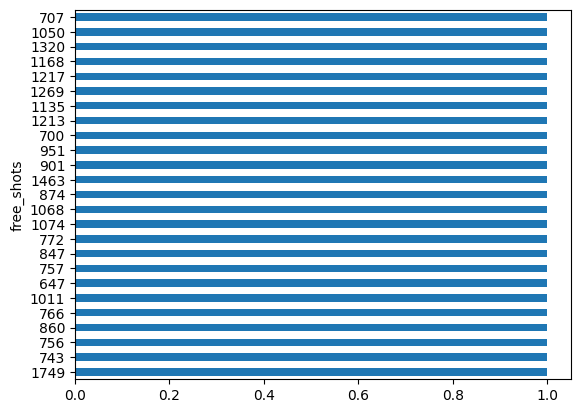

In [50]:
df["free_shots"].value_counts().plot.barh()

<BarContainer object of 3 artists>

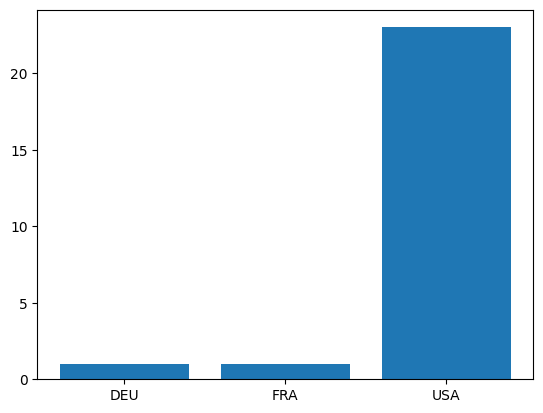

In [61]:
country = df_dropped["country"].value_counts().sort_index()
plt.bar(x = country.index, height= country.values)

Text(0.5, 1.0, 'Count of country')

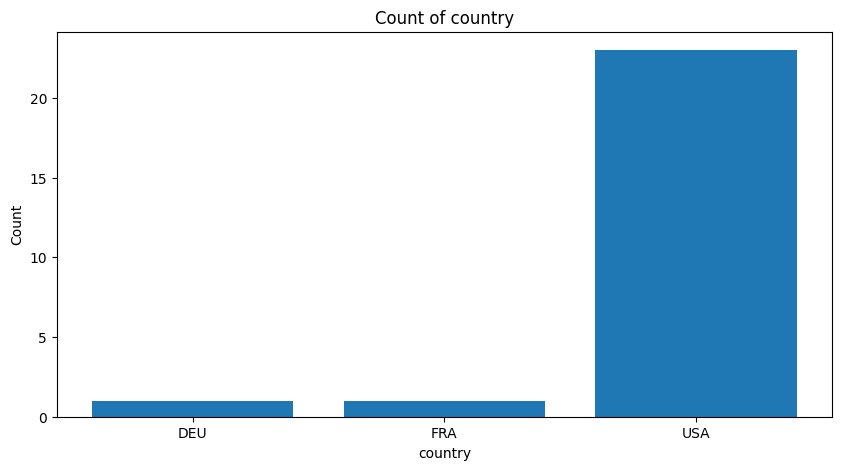

In [77]:
plt.figure(figsize=(10,5))

plt.bar(x = country.index, height= country.values)
plt.xlabel("country")
plt.ylabel("Count")
plt.title("Count of country")

Text(0.5, 1.0, 'Count of country')

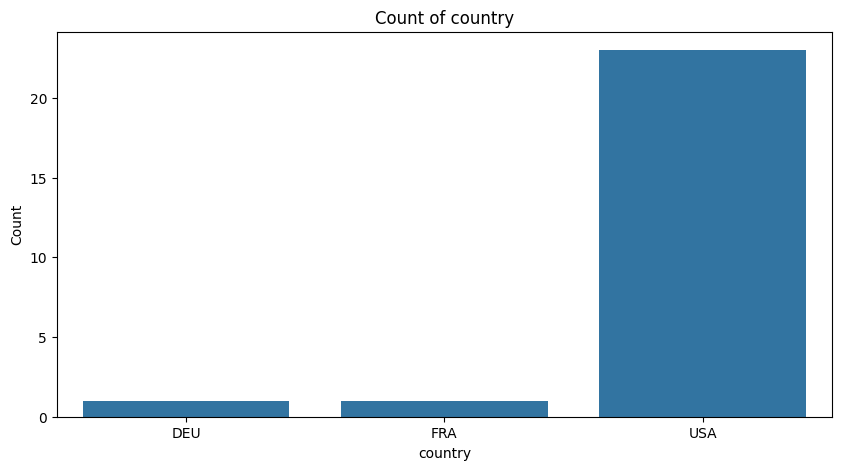

In [76]:
plt.figure(figsize=(10,5))

sns.barplot(x = country.index, y= country.values)
plt.xlabel("country")
plt.ylabel("Count")
plt.title("Count of country")